In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import pandas_profiling
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings;
warnings.filterwarnings('ignore');

In [2]:
#Import the data
df_diabetes=pd.read_csv("diabetes.csv");
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Lets do profiling
profile = df_diabetes.profile_report()
profile = df_diabetes.profile_report(title='Pandas Profiling Report before data profiling')
profile.to_file(output_file="output_before_profiling.html")

## Observations from profiling
1. Blood Pressure has 35 0's which is not right value. So will replace with mean of BP column
2. BMI has 11 values as 0 which is not right value. So will replace this with mean value of BMI
3. Insulin also had 374 values as 0 so it will be replaced with mean
4. Pregnencies has value as 0 which looks OK, if they are 0 months pregnant
5. Skin thickness has 227 alues as 0 which also not right value. So will be replaced with maen value

Since there are many columns which needs to be filled with mean, So a fction will be defined and fill the Na value with mean

In [6]:
#df_copy=df_diabetes.copy(deep=True)

In [4]:
# Filled all 0 values for all columns where 0 is anomly
def fill_nan_columns(columns_passed):
    for eachcol in columns_passed:
        df_diabetes[eachcol].replace(0,np.nan,inplace=True)
        df_diabetes[eachcol].fillna(round(df_diabetes["BMI"].mean(),1),inplace=True)

cols_passed={"BloodPressure","SkinThickness","Insulin","BMI"}
fill_nan_columns(cols_passed)


df_diabetes.iloc[[9,49]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96.0,32.5,32.5,32.5,0.232,54,1
49,7,105,32.5,32.5,32.5,32.5,0.305,24,0


In [5]:
df_diabetes[(np.abs(stats.zscore(df_diabetes)) > 3).all(axis=1)]
# there are no outliers present

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
# Profiling after feature enginnering
# Lets do profiling
profile = df_diabetes.profile_report()
profile = df_diabetes.profile_report(title='Pandas Profiling Report after data profiling')
profile.to_file(output_file="output_after_profiling.html")

Data looks clean and clear after profiling
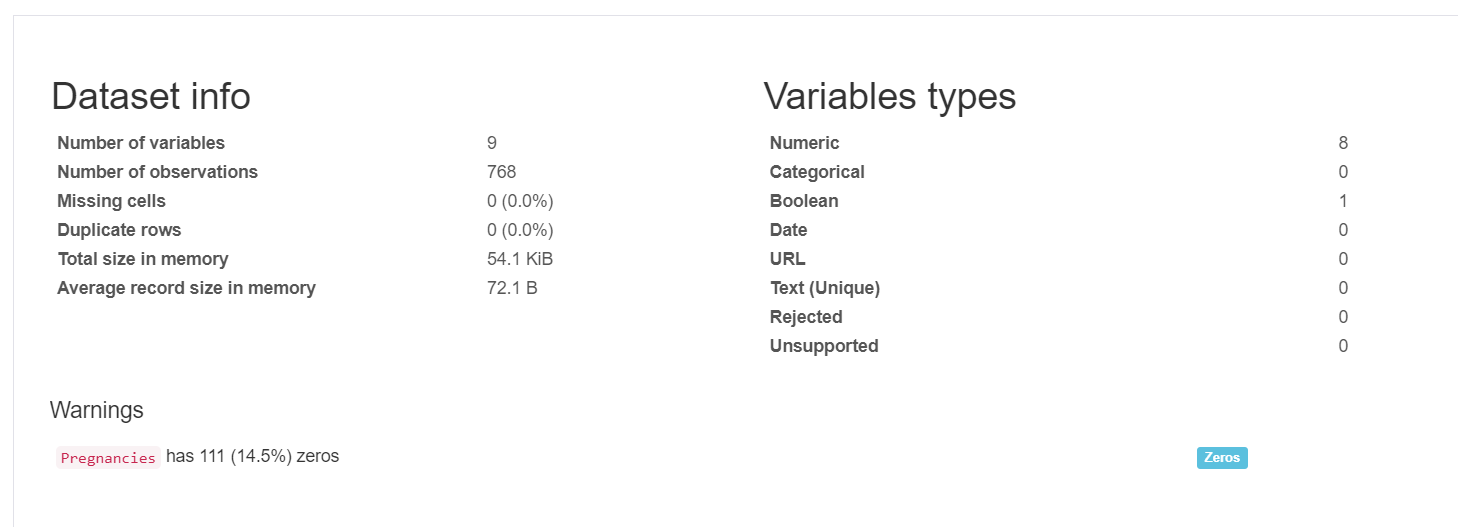

In [6]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,70.586589,30.142578,95.626302,32.458073,0.471876,33.240885,0.348958
std,3.369578,31.972618,14.685912,8.922755,104.957943,6.875153,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,32.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.500000,32.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.500000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


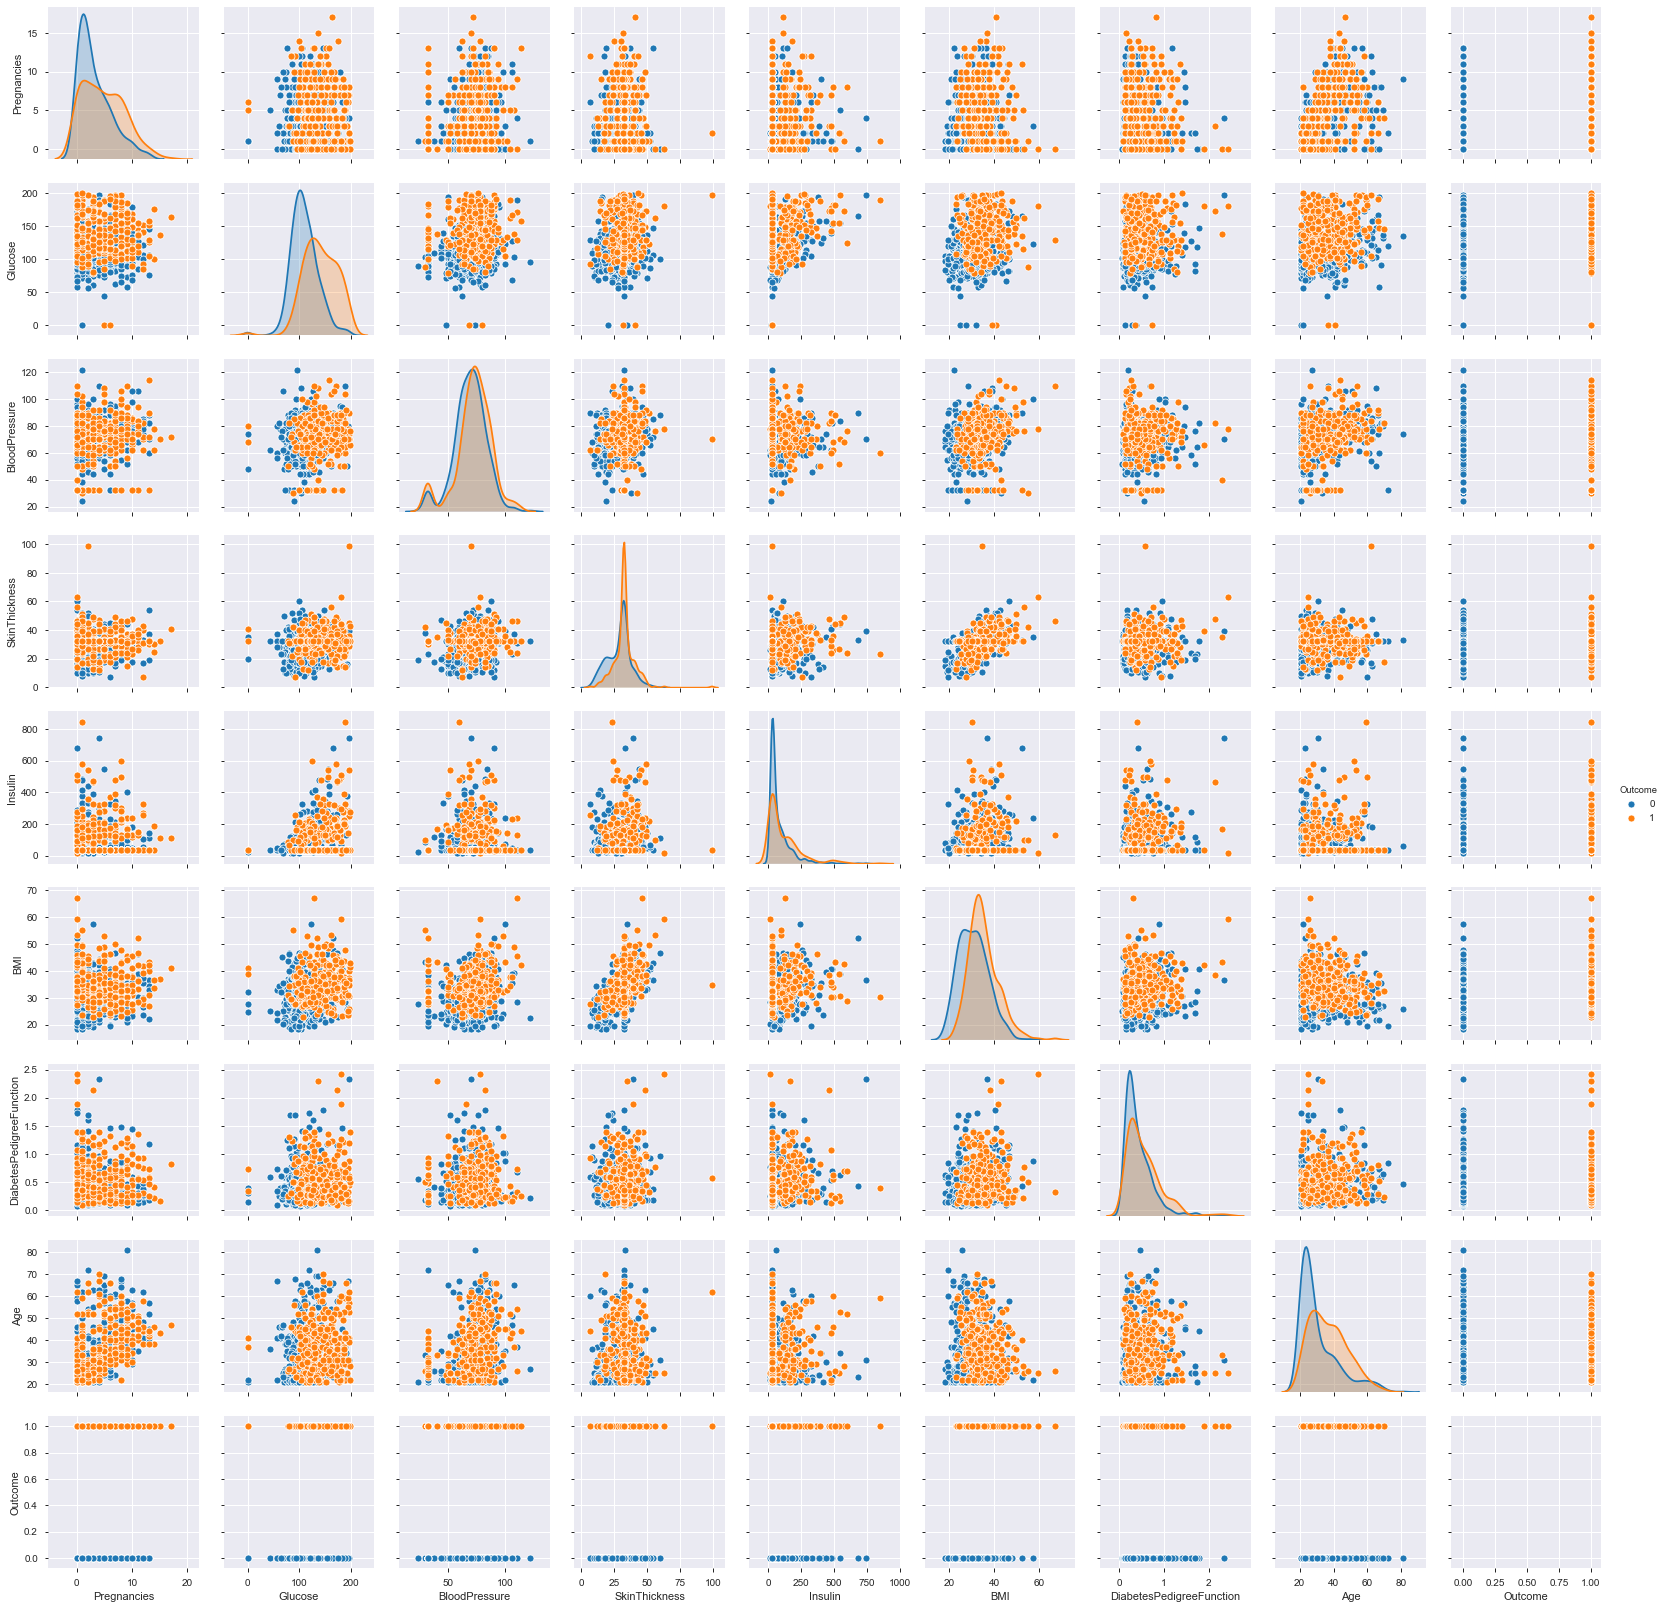

In [7]:
# Lets see the corelation using pair plot between the valiables
sns.pairplot(data=df_diabetes, hue="Outcome",kind="scatter")

## Observations
1. The problem is classification problem
2. The data points are very close in all pairplots so Logistic regression will not be applied
3. We will use KNN algo to find the predcition

In [8]:
# first lest scale the data
scaler=StandardScaler()
df_new=scaler.fit_transform(df_diabetes.iloc[:,0:8])
type(df_new)

df_diabetes_cols=df_diabetes.columns
df_diabetes_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#Convert the standerdized data into datframe
df_new=pd.DataFrame(df_new,columns=df_diabetes_cols[0:8])
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.096305,0.544741,-0.601836,0.166203,0.468492,1.425995
1,-0.844885,-1.123396,-0.312516,-0.128136,-0.601836,-0.852620,-0.365061,-0.190672
2,1.233880,1.943724,-0.448789,0.264376,-0.601836,-1.332922,0.604397,-0.105584
3,-0.844885,-0.998208,-0.312516,-0.801012,-0.015505,-0.634300,-0.920763,-1.041549
4,-1.141852,0.504055,-2.084074,0.544741,0.689999,1.548891,5.484909,-0.020496


In [10]:
#Split the traon and test Data with Test data as 20%
X_train,X_test,y_train,y_test= train_test_split(df_new,df_diabetes.iloc[:,8],test_size=.2,random_state=42)

In [11]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
log_reg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [13]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.7671009771986971
0.7532467532467533


In [14]:
np.sqrt(len(X_train))

# Sqrt of train data os ~25. lets take 25 as K value

24.779023386727733

In [15]:
knn_class=KNeighborsClassifier(25)
knn_class.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [16]:
knn_class.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [17]:
knn_class.score(X_train,y_train)

0.7915309446254072

In [18]:
train_score=[]
test_score=[]
for eachVal in range(21,30):
    knn_class=KNeighborsClassifier(eachVal)
    knn_class.fit(X_train,y_train)
    train_score.append(knn_class.score(X_train,y_train))
    test_score.append(knn_class.score(X_test,y_test))

print(train_score)
print(test_score)
    

[0.7931596091205212, 0.7866449511400652, 0.7850162866449512, 0.7850162866449512, 0.7915309446254072, 0.7752442996742671, 0.7882736156351792, 0.7899022801302932, 0.7899022801302932]
[0.7662337662337663, 0.7727272727272727, 0.7402597402597403, 0.7662337662337663, 0.7467532467532467, 0.7727272727272727, 0.7467532467532467, 0.7532467532467533, 0.7532467532467533]


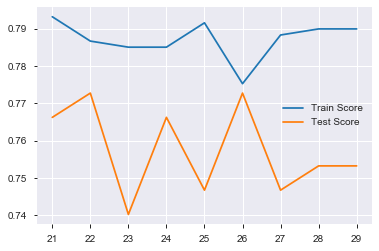

In [19]:
sns.lineplot(x=range(21,30),y=train_score,markers='*',label="Train Score")
sns.lineplot(x=range(21,30),y=test_score,markers='0', label="Test Score")